In [48]:
import pandas as pd
import os

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import random
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

## 파일 한번에 불러오기

In [49]:
os.listdir('C:/Users/user/Desktop/생활인구 분석/data') # 폴더안에 데이터 확인

['LOCAL_PEOPLE_DONG_202111.csv',
 'LOCAL_PEOPLE_DONG_202112.csv',
 'LOCAL_PEOPLE_DONG_202201.csv',
 'LOCAL_PEOPLE_DONG_202202.csv',
 'LOCAL_PEOPLE_DONG_202203.csv',
 'LOCAL_PEOPLE_DONG_202204.csv',
 'LOCAL_PEOPLE_DONG_202205.csv',
 'LOCAL_PEOPLE_DONG_202206.csv',
 'LOCAL_PEOPLE_DONG_202207.csv',
 'LOCAL_PEOPLE_DONG_202208.csv',
 'LOCAL_PEOPLE_DONG_202209.csv',
 'LOCAL_PEOPLE_DONG_202210.csv']

### 1. 파일리스트 저장

In [50]:
forders= os.listdir('C:/Users/user/Desktop/생활인구 분석/data')

### 2. 현재 작업위치(working directory) 이동

In [51]:
cd C:/Users/user/Desktop/생활인구 분석/data

C:\Users\user\Desktop\생활인구 분석\data


### 3. 데이터 프레임 생성하고 모든 파일 합치기

In [52]:
# 새로운 데이터 프레임 생성
df_all = pd.DataFrame()

for files in forders:
    df= pd.read_csv(files)
    df_all= pd.concat([df_all, df])

In [53]:
df_all.shape

(3714240, 32)

### 인덱스 생성이 안되고 하나씩 밀려 마지막 컬럼 데이터가 na값을 떠서 전처리 진행

In [54]:
# 
df_all = df_all.reset_index()
columns=['index', '기준일ID', '시간대구분', '행정동코드','총생활인구수','남자0세부터9세생활인구수','남자10세부터14세생활인구수',
         '남자15세부터19세생활인구수','남자20세부터24세생활인구수','남자25세부터29세생활인구수','남자30세부터34세생활인구수',
         '남자35세부터39세생활인구수','남자40세부터44세생활인구수','남자45세부터49세생활인구수','남자50세부터54세생활인구수',
         '남자55세부터59세생활인구수','남자60세부터64세생활인구수','남자65세부터69세생활인구수','남자70세이상생활인구수',
         '여자0세부터9세생활인구수', '여자10세부터14세생활인구수','여자15세부터19세생활인구수','여자20세부터24세생활인구수',
         '여자25세부터29세생활인구수','여자30세부터34세생활인구수','여자35세부터39세생활인구수','여자40세부터44세생활인구수',
         '여자45세부터49세생활인구수','여자50세부터54세생활인구수','여자55세부터59세생활인구수','여자60세부터64세생활인구수',
         '여자65세부터69세생활인구수','여자70세이상생활인구수'
        ]
df_all.columns = ['기준일ID', '시간대구분', '행정동코드','총생활인구수','남자0세부터9세생활인구수','남자10세부터14세생활인구수',
         '남자15세부터19세생활인구수','남자20세부터24세생활인구수','남자25세부터29세생활인구수','남자30세부터34세생활인구수',
         '남자35세부터39세생활인구수','남자40세부터44세생활인구수','남자45세부터49세생활인구수','남자50세부터54세생활인구수',
         '남자55세부터59세생활인구수','남자60세부터64세생활인구수','남자65세부터69세생활인구수','남자70세이상생활인구수',
         '여자0세부터9세생활인구수', '여자10세부터14세생활인구수','여자15세부터19세생활인구수','여자20세부터24세생활인구수',
         '여자25세부터29세생활인구수','여자30세부터34세생활인구수','여자35세부터39세생활인구수','여자40세부터44세생활인구수',
         '여자45세부터49세생활인구수','여자50세부터54세생활인구수','여자55세부터59세생활인구수','여자60세부터64세생활인구수',
         '여자65세부터69세생활인구수','여자70세이상생활인구수','삭제할거']
df_all = df_all.drop(['삭제할거'], axis=1)
df_all.head()

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20211101,0,11470680,22796.1407,923.0070,711.7903,909.9247,539.8603,518.2143,454.1050,...,584.7537,582.2004,855.8530,984.2143,1187.6181,910.6085,989.2366,739.4816,655.7578,1825.7043
1,20211101,0,11440730,37070.1563,1025.1173,641.0870,952.5836,882.8019,1394.7769,1320.5975,...,2014.1641,1819.3859,1955.7305,1665.3989,1778.8869,1464.1282,1314.2796,996.9937,864.2240,2469.8634
2,20211101,0,11200590,17952.5176,622.3245,343.4822,428.0153,353.0400,420.6893,548.9845,...,538.7121,761.5728,1201.3565,976.9668,847.8513,651.6338,635.9192,685.6647,526.9343,995.3734
3,20211101,0,11680656,30585.8034,1644.0636,1071.3652,1110.4852,523.9506,491.3009,474.0898,...,637.2576,677.0421,1294.0869,1615.3140,2059.4089,1209.8651,986.0412,801.8508,725.5164,1646.3559
4,20211101,0,11680730,16468.2665,512.3320,359.8518,496.5155,386.0319,550.8848,617.2569,...,659.9285,559.7440,698.3132,599.5171,698.4464,597.0887,656.8235,753.0073,660.7689,1139.4285


### 동대문구의 행정동만 추출

In [55]:
code = [
    11230710, #회기동
    11230720, # 휘경1동
    11230730, # 휘경2동
    11230705, # 청량리동
    11230536, # 용신동
    11230545, # 제기동
    11230560, # 전농1동
    11230570, # 전농2동
    11230610, # 답십리2동
    11230650, # 장안1동
    11230660, # 장안2동
    11230740, # 이문1동
    11230750, # 이문2동
    11230600  # 답십리1동

    
]
df_all = df_all[df_all['행정동코드'].isin(code)]

In [56]:
df_all

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
79,20211101,0,11230750,19086.5361,635.9586,384.1609,548.1936,543.3057,509.7348,443.3652,...,593.0101,579.4084,788.3362,787.8424,746.0449,742.1110,657.9561,567.5866,501.6963,1667.5605
98,20211101,0,11230720,16269.1330,252.4466,140.0671,364.0680,1065.2972,1021.9827,572.5482,...,1114.8362,593.8281,547.5225,464.6307,465.0657,515.3773,484.6705,444.6549,367.5878,1037.0977
107,20211101,0,11230610,26288.4922,801.0830,403.2389,448.7943,582.0689,794.7819,964.3348,...,880.4735,1051.6051,1313.1859,1068.2548,1089.5850,1012.2316,1181.4896,1082.6850,764.5580,2181.5984
136,20211101,0,11230650,34691.2770,1092.6375,472.0759,681.3930,806.8622,1301.8428,1389.1542,...,1561.2006,1575.0476,1993.7501,1509.3967,1312.2056,1180.4029,1289.7592,1272.8638,856.0121,1978.6864
150,20211101,0,11230560,31724.4173,1131.7831,554.3907,645.4174,1327.9090,1512.2362,971.4244,...,1396.5334,1126.5370,1230.3702,1110.6067,1056.7399,1094.2535,1208.2412,966.6552,894.9186,2235.5663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713980,20221031,23,11230650,36920.3392,1251.2032,540.5840,621.6625,818.3961,1431.5617,1536.6856,...,1745.6904,1603.0860,2097.8997,1637.8281,1344.8377,1213.3083,1368.6816,1187.5061,923.3381,2146.7067
3714111,20221031,23,11230710,21374.3810,449.8795,219.9095,649.8545,2351.9613,1346.5239,680.4020,...,1478.9507,599.6763,568.8885,505.1282,502.7106,488.6654,547.9539,445.4541,456.8861,1256.7353
3714112,20221031,23,11230740,26194.6789,372.9491,237.9516,848.0473,2996.8210,1934.4291,812.3751,...,1733.8175,649.3319,591.7819,558.7424,631.9122,617.2188,522.7377,477.9042,414.3529,1214.4703
3714140,20221031,23,11230720,17631.6780,284.4984,157.8507,454.9429,1337.5698,1039.0107,596.4245,...,1256.7270,650.9454,533.4027,460.7492,507.9295,479.9806,464.6972,400.3246,334.2528,929.6682


### 기준일ID 컬럼을 date형식으로 변환

In [57]:
# 년, 월 컬럼 생성
def create_dates(df_temp):
    df_temp.insert(0, '날짜', pd.to_datetime(df_temp['기준일ID'], format='%Y%m%d'))
    df_temp.insert(1, '년', df_temp['날짜'].dt.year)
    df_temp.insert(2, '월', df_temp['날짜'].dt.month)

    # 주말 여부 컬럼 생성
    df_temp.insert(3, "주말여부", df_temp['날짜'].dt.dayofweek > 4)
    df_temp['주말여부'] = df_temp['주말여부'].apply(lambda x: '주말' if x==True else '평일')

    # 기준일ID컬럼 drop
    df_temp.drop(columns=['기준일ID'], inplace=True)
    return df_temp

create_dates(df_all)

,날짜,년,월,주말여부,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
79,2021-11-01,2021,11,평일,0,11230750,19086.5361,635.9586,384.1609,548.1936,...,593.0101,579.4084,788.3362,787.8424,746.0449,742.1110,657.9561,567.5866,501.6963,1667.5605
98,2021-11-01,2021,11,평일,0,11230720,16269.1330,252.4466,140.0671,364.0680,...,1114.8362,593.8281,547.5225,464.6307,465.0657,515.3773,484.6705,444.6549,367.5878,1037.0977
107,2021-11-01,2021,11,평일,0,11230610,26288.4922,801.0830,403.2389,448.7943,...,880.4735,1051.6051,1313.1859,1068.2548,1089.5850,1012.2316,1181.4896,1082.6850,764.5580,2181.5984
136,2021-11-01,2021,11,평일,0,11230650,34691.2770,1092.6375,472.0759,681.3930,...,1561.2006,1575.0476,1993.7501,1509.3967,1312.2056,1180.4029,1289.7592,1272.8638,856.0121,1978.6864
150,2021-11-01,2021,11,평일,0,11230560,31724.4173,1131.7831,554.3907,645.4174,...,1396.5334,1126.5370,1230.3702,1110.6067,1056.7399,1094.2535,1208.2412,966.6552,894.9186,2235.5663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713980,2022-10-31,2022,10,평일,23,11230650,36920.3392,1251.2032,540.5840,621.6625,...,1745.6904,1603.0860,2097.8997,1637.8281,1344.8377,1213.3083,1368.6816,1187.5061,923.3381,2146.7067
3714111,2022-10-31,2022,10,평일,23,11230710,21374.3810,449.8795,219.9095,649.8545,...,1478.9507,599.6763,568.8885,505.1282,502.7106,488.6654,547.9539,445.4541,456.8861,1256.7353
3714112,2022-10-31,2022,10,평일,23,11230740,26194.6789,372.9491,237.9516,848.0473,...,1733.8175,649.3319,591.7819,558.7424,631.9122,617.2188,522.7377,477.9042,414.3529,1214.4703
3714140,2022-10-31,2022,10,평일,23,11230720,17631.6780,284.4984,157.8507,454.9429,...,1256.7270,650.9454,533.4027,460.7492,507.9295,479.9806,464.6972,400.3246,334.2528,929.6682


In [58]:
df_all.describe()

,년,월,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
count,122640.000000,122640.000000,122640.000000,1.226400e+05,122640.000000,122640.000000,122640.000000,122640.000000,122640.000000,122640.000000,...,122640.000000,122640.000000,122640.000000,122640.000000,122640.000000,122640.000000,122640.000000,122640.000000,122640.000000,122640.000000
mean,2021.832877,6.526027,11.500000,1.123065e+07,24565.302102,737.497542,367.321669,594.241773,1081.698388,1056.155172,...,1051.731374,836.253478,973.886264,842.378899,894.505154,832.493427,905.761978,805.517277,660.089958,1813.881718
std,0.373087,3.447865,6.922215,7.499173e+01,7676.294060,313.770293,131.976211,220.857133,591.418469,438.000271,...,448.243919,363.670251,441.221881,332.457337,325.913637,296.913007,345.218902,311.983968,248.147562,676.945368
min,2021.000000,1.000000,0.000000,1.123054e+07,9633.545700,132.275800,73.391800,80.377700,201.802000,201.839800,...,217.623700,203.366000,297.436200,299.031300,359.941000,312.341100,282.458900,261.477000,251.197800,802.679900
25%,2022.000000,4.000000,5.750000,1.123057e+07,18154.942200,469.774300,268.051975,437.007550,595.615475,685.938750,...,673.709775,558.827475,597.743600,564.756650,634.835825,595.132925,595.647575,528.238100,449.571750,1291.032425
50%,2022.000000,7.000000,11.500000,1.123066e+07,22886.929000,708.908150,364.368950,564.876050,926.397150,1013.688600,...,1007.944150,721.228100,797.217150,748.084300,813.646650,772.895150,883.871950,786.268550,606.123100,1651.609600
75%,2022.000000,10.000000,17.250000,1.123072e+07,30521.156050,940.910975,444.098800,714.358300,1427.172125,1386.574100,...,1402.752000,1007.992825,1317.132900,1087.347325,1128.881525,1042.670175,1144.470125,1009.692900,842.683575,2101.437175
max,2022.000000,12.000000,23.000000,1.123075e+07,54743.938900,1954.522300,921.562000,4984.047900,5961.097700,2304.201400,...,2502.373800,2144.280500,2418.108400,2000.640000,2402.091700,2084.248700,2421.171100,2040.549600,1762.211700,6103.356100


In [59]:
df_all.dtypes

날짜                 datetime64[ns]
년                           int64
월                           int64
주말여부                       object
시간대구분                       int64
행정동코드                       int64
총생활인구수                    float64
남자0세부터9세생활인구수             float64
남자10세부터14세생활인구수           float64
남자15세부터19세생활인구수           float64
남자20세부터24세생활인구수           float64
남자25세부터29세생활인구수           float64
남자30세부터34세생활인구수           float64
남자35세부터39세생활인구수           float64
남자40세부터44세생활인구수           float64
남자45세부터49세생활인구수           float64
남자50세부터54세생활인구수           float64
남자55세부터59세생활인구수           float64
남자60세부터64세생활인구수           float64
남자65세부터69세생활인구수           float64
남자70세이상생활인구수              float64
여자0세부터9세생활인구수             float64
여자10세부터14세생활인구수           float64
여자15세부터19세생활인구수           float64
여자20세부터24세생활인구수           float64
여자25세부터29세생활인구수           float64
여자30세부터34세생활인구수           float64
여자35세부터39세생활인구수           float64
여자40세부터44세생활인구수           float64
여자45세부터49세생활인구

In [60]:
df_all = df_all.astype({'총생활인구수' : 'int'})
df_all.head()

,날짜,년,월,주말여부,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
79,2021-11-01,2021,11,평일,0,11230750,19086,635.9586,384.1609,548.1936,...,593.0101,579.4084,788.3362,787.8424,746.0449,742.1110,657.9561,567.5866,501.6963,1667.5605
98,2021-11-01,2021,11,평일,0,11230720,16269,252.4466,140.0671,364.0680,...,1114.8362,593.8281,547.5225,464.6307,465.0657,515.3773,484.6705,444.6549,367.5878,1037.0977
107,2021-11-01,2021,11,평일,0,11230610,26288,801.0830,403.2389,448.7943,...,880.4735,1051.6051,1313.1859,1068.2548,1089.5850,1012.2316,1181.4896,1082.6850,764.5580,2181.5984
136,2021-11-01,2021,11,평일,0,11230650,34691,1092.6375,472.0759,681.3930,...,1561.2006,1575.0476,1993.7501,1509.3967,1312.2056,1180.4029,1289.7592,1272.8638,856.0121,1978.6864
150,2021-11-01,2021,11,평일,0,11230560,31724,1131.7831,554.3907,645.4174,...,1396.5334,1126.5370,1230.3702,1110.6067,1056.7399,1094.2535,1208.2412,966.6552,894.9186,2235.5663


## 동대문구 11월 평균 총생활인구수

In [61]:
df_all.loc[df_all['월'] == 11, '총생활인구수'].sum() // df_all.loc[df_all['월'] == 11, ['총생활인구수']].count()

총생활인구수    24598
dtype: int64

In [62]:
df_all.loc[df_all['월'] == 11, '총생활인구수'].sum() // df_all.loc[df_all['월'] == 11, '총생활인구수'].count()

24598

In [63]:
def bar_Graph(width, values, count, g_x, g_y, g_title) : 
    arr = np.arange(count)
    color = []
    for i in range(count) : # 바 그래프 랜덤 색상 만들기
        if (color is None)  :
            color = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])]
        color.append("#" + ''.join([random.choice('0123456789ABCDEF') for n in range(6)]))
    
    
    plt.figure(figsize=(10, 8))

    plt.bar(arr, 
            values, 
            color=color, # 색상 
            alpha = 0.5, # 투명도
            edgecolor = 'black', # 모서리 색상
            linewidth = 2.5 # 테두리 두께
           )
    
    plt.xticks(arr, width, fontsize=12)
    
    plt.title(g_title, fontsize=12) # 타이틀
    plt.xlabel(g_x, fontsize=12) # x 축 라벨링
    plt.ylabel(g_y, fontsize=12) # y 축 라벨링
    
    add_value_label(width, np.round(values, 3))
    
    plt.show()

In [64]:
# 그래프 가운데 값 표시
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,y_list[i-1],y_list[i-1], 
                 fontsize=15,
                 color="blue", # 글자 색상
                 ha="center")

## 월 별 평균 생활인구

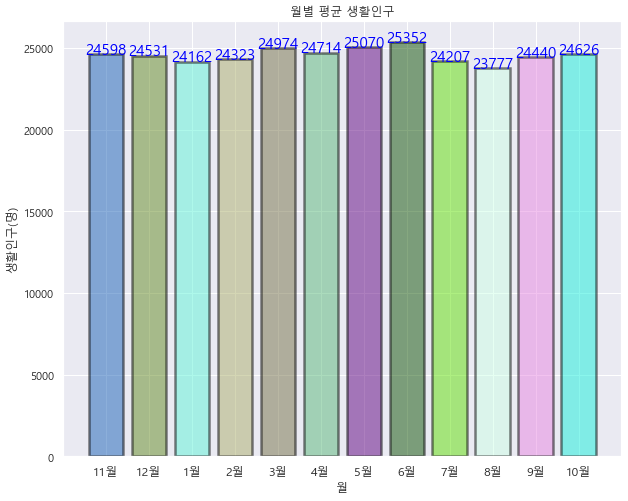

In [65]:
bar_Graph(['11월','12월','1월', '2월','3월','4월','5월','6월','7월','8월','9월','10월'], 
          
          [df_all.loc[df_all['월'] == 11, '총생활인구수'].sum() // df_all.loc[df_all['월'] == 11, '총생활인구수'].count(),
           df_all.loc[df_all['월'] == 12, '총생활인구수'].sum() // df_all.loc[df_all['월'] == 12, '총생활인구수'].count(),
           df_all.loc[df_all['월'] == 1, '총생활인구수'].sum() // df_all.loc[df_all['월'] == 1, '총생활인구수'].count(),
           df_all.loc[df_all['월'] == 2, '총생활인구수'].sum() // df_all.loc[df_all['월'] == 2, '총생활인구수'].count(),
           df_all.loc[df_all['월'] == 3, '총생활인구수'].sum() // df_all.loc[df_all['월'] == 3, '총생활인구수'].count(),
           df_all.loc[df_all['월'] == 4, '총생활인구수'].sum() // df_all.loc[df_all['월'] == 4, '총생활인구수'].count(),
           df_all.loc[df_all['월'] == 5, '총생활인구수'].sum() // df_all.loc[df_all['월'] == 5, '총생활인구수'].count(),
           df_all.loc[df_all['월'] == 6, '총생활인구수'].sum() // df_all.loc[df_all['월'] == 6, '총생활인구수'].count(),
           df_all.loc[df_all['월'] == 7, '총생활인구수'].sum() // df_all.loc[df_all['월'] == 7, '총생활인구수'].count(),
           df_all.loc[df_all['월'] == 8, '총생활인구수'].sum() // df_all.loc[df_all['월'] == 8, '총생활인구수'].count(),
           df_all.loc[df_all['월'] == 9, '총생활인구수'].sum() // df_all.loc[df_all['월'] == 9, '총생활인구수'].count(),
           df_all.loc[df_all['월'] == 10, '총생활인구수'].sum() // df_all.loc[df_all['월'] == 10, '총생활인구수'].count()
          ], 12, '월', '생활인구(명)', '월별 평균 생활인구') # 가로이름, 값, 갯수, x라벨, y라벨, 제목

## 평일 주말 구분 평균 생활인구

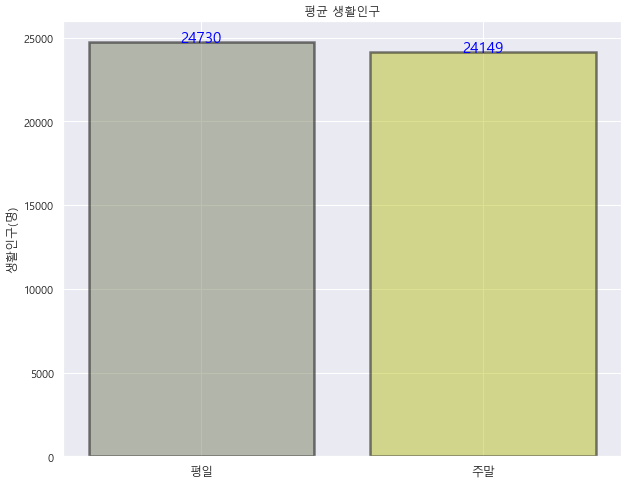

In [66]:
bar_Graph(['평일', '주말'], 
          
          [df_all.loc[df_all['주말여부'] == '평일', '총생활인구수'].sum() // df_all.loc[df_all['주말여부'] == '평일', '총생활인구수'].count(),
           df_all.loc[df_all['주말여부'] == '주말', '총생활인구수'].sum() // df_all.loc[df_all['주말여부'] == '주말', '총생활인구수'].count()
          ], 2, ' ', '생활인구(명)', '평균 생활인구') # 가로이름, 값, 갯수, x라벨, y라벨, 제목

## 성별 평균 생활인구

In [67]:
df_all['남성합'] = df_all[['남자0세부터9세생활인구수','남자10세부터14세생활인구수',
         '남자15세부터19세생활인구수','남자20세부터24세생활인구수','남자25세부터29세생활인구수','남자30세부터34세생활인구수',
         '남자35세부터39세생활인구수','남자40세부터44세생활인구수','남자45세부터49세생활인구수','남자50세부터54세생활인구수',
         '남자55세부터59세생활인구수','남자60세부터64세생활인구수','남자65세부터69세생활인구수','남자70세이상생활인구수']].sum(axis=1)

In [68]:
df_all['여성합'] = df_all[['여자0세부터9세생활인구수', '여자10세부터14세생활인구수','여자15세부터19세생활인구수','여자20세부터24세생활인구수',
         '여자25세부터29세생활인구수','여자30세부터34세생활인구수','여자35세부터39세생활인구수','여자40세부터44세생활인구수',
         '여자45세부터49세생활인구수','여자50세부터54세생활인구수','여자55세부터59세생활인구수','여자60세부터64세생활인구수',
         '여자65세부터69세생활인구수','여자70세이상생활인구수']].sum(axis=1)

In [69]:
df_all['남성합'].sum() // df_all['남성합'].count()

11682.0

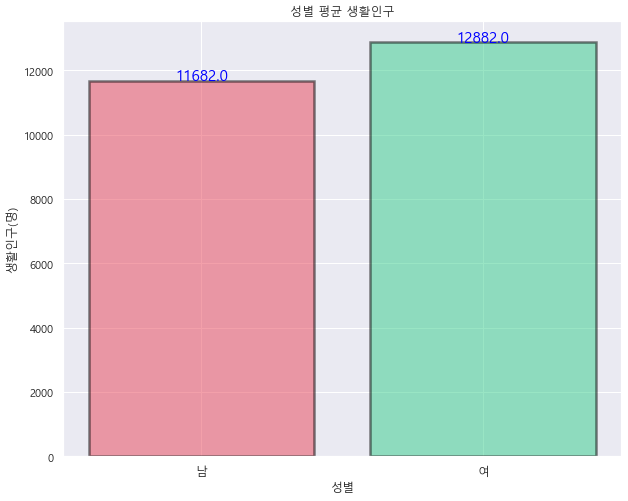

In [114]:
bar_Graph(['남', '여'], 
          
          [df_all['남성합'].sum() // df_all['남성합'].count(),
           df_all['여성합'].sum() // df_all['여성합'].count()
          ], 2, '성별', '생활인구(명)', '성별 평균 생활인구') # 가로이름, 값, 갯수, x라벨, y라벨, 제목

### 코드번호 -> 행정동명으로 변경

In [71]:
df_all = df_all.replace([11230710, #회기동
        11230720, # 휘경1동
        11230730, # 휘경2동
        11230705, # 청량리동
        11230536, # 용신동
        11230545, # 제기동
        11230560, # 전농1동
        11230570, # 전농2동
        11230610, # 답십리2동
        11230650, # 장안1동
        11230660, # 장안2동
        11230740, # 이문1동
        11230750, # 이문2동
        11230600], # 답십리1동
               ['회기동', '휘경1동', '휘경2동', '청량리동', '용신동', '제기동', '전농1동', '전농2동', '답십리2동', '장안1동', '장안2동', '이문1동', '이문2동', '답십리1동']
)

In [72]:
df_all.head()

,날짜,년,월,주말여부,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,...,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,남성합,여성합
79,2021-11-01,2021,11,평일,0,이문2동,19086,635.9586,384.1609,548.1936,...,788.3362,787.8424,746.0449,742.1110,657.9561,567.5866,501.6963,1667.5605,8942.5821,10143.9545
98,2021-11-01,2021,11,평일,0,휘경1동,16269,252.4466,140.0671,364.0680,...,547.5225,464.6307,465.0657,515.3773,484.6705,444.6549,367.5878,1037.0977,7184.2102,9084.9239
107,2021-11-01,2021,11,평일,0,답십리2동,26288,801.0830,403.2389,448.7943,...,1313.1859,1068.2548,1089.5850,1012.2316,1181.4896,1082.6850,764.5580,2181.5984,12349.1624,13939.3306
136,2021-11-01,2021,11,평일,0,장안1동,34691,1092.6375,472.0759,681.3930,...,1993.7501,1509.3967,1312.2056,1180.4029,1289.7592,1272.8638,856.0121,1978.6864,16934.7433,17756.5331
150,2021-11-01,2021,11,평일,0,전농1동,31724,1131.7831,554.3907,645.4174,...,1230.3702,1110.6067,1056.7399,1094.2535,1208.2412,966.6552,894.9186,2235.5663,15471.5139,16252.9026


## 행정동별 평균 생활인구

In [73]:
pop_mean = df_all.groupby('행정동코드').총생활인구수.sum() // df_all.groupby('행정동코드').총생활인구수.count()
pop_mean = pop_mean.sort_values()
pop_mean

행정동코드
이문2동     14983
전농2동     16734
휘경1동     16974
청량리동     19051
회기동      20065
휘경2동     20409
답십리2동    22172
답십리1동    23361
이문1동     24321
장안2동     27539
전농1동     31021
제기동      33004
장안1동     34455
용신동      39811
Name: 총생활인구수, dtype: int64

In [74]:
label = ['이문2동', '전농2동', '휘경1동', '청량리동', '회기동', '휘경2동', '답십리2동', '답십리1동', '이문1동', '장안2동', '전농1동', 
         '제기동', '장안1동', '용신동']

index = np.arange(len(label))
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

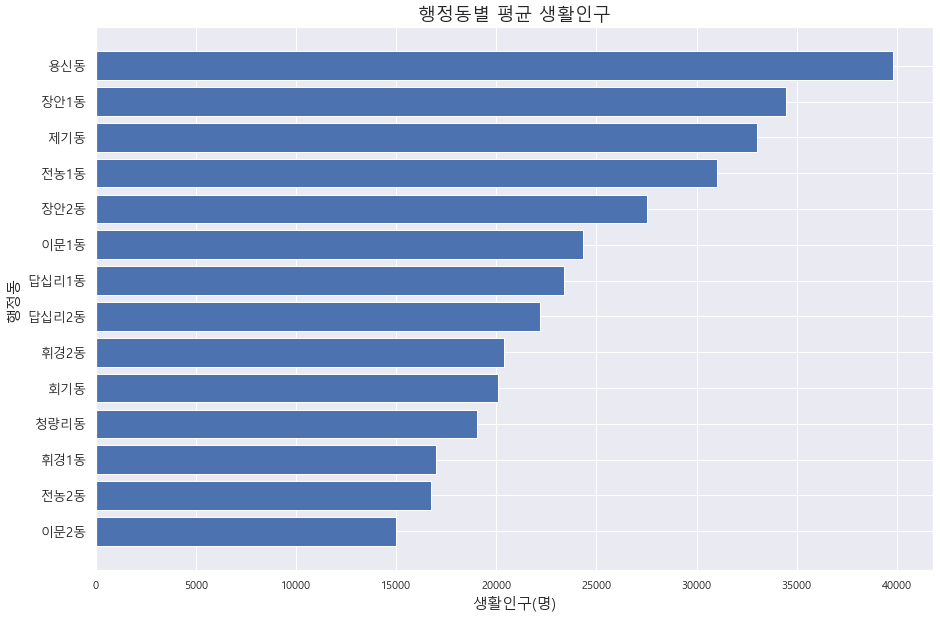

In [75]:
plt.figure(figsize=(15, 10))

plt.barh(index, pop_mean)

plt.title('행정동별 평균 생활인구', fontsize=18)

plt.ylabel('행정동', fontsize=15)

plt.xlabel('생활인구(명)', fontsize=15)

plt.yticks(index, label, fontsize=13, rotation=0)

plt.show()

## 시간대별 동대문구 평균 생활인구

In [76]:
def ddm_time_pop_mean() :
    pop_time_mean = df_all.groupby('시간대구분').총생활인구수.sum() // df_all.groupby('시간대구분').총생활인구수.count()
    label = []
    for i in range(len(pop_time_mean)) :
        label.append(str(i)+'시')

    index = np.arange(len(label))

    plt.figure(figsize=(15, 10))

    plt.bar(index, pop_time_mean)

    plt.title('시간대별 평균 생활인구', fontsize=20)

    plt.xlabel('시간(시)', fontsize=18)

    plt.ylabel('생활인구(명)', fontsize=18)

    plt.xticks(index, label, fontsize=15)

    plt.show()

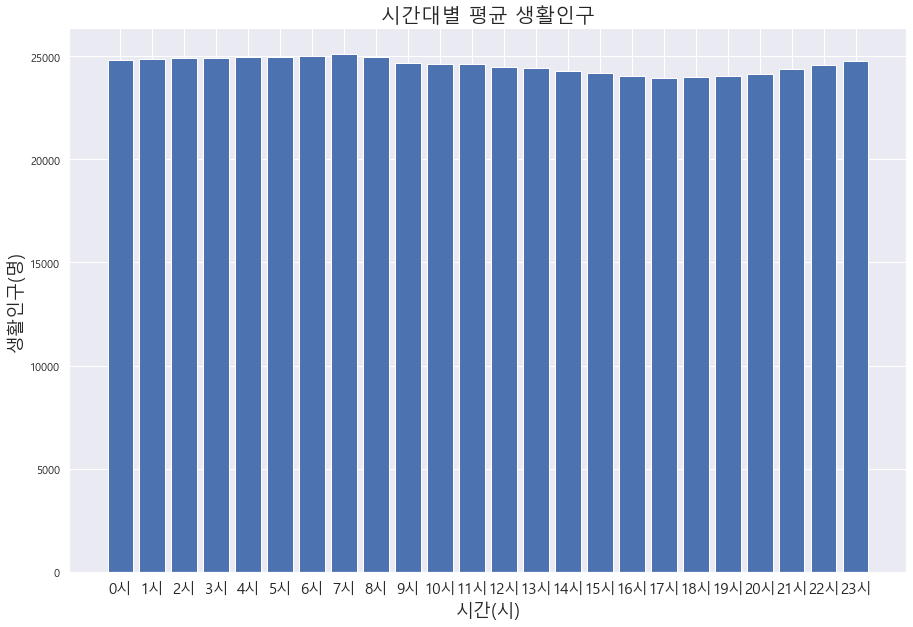

In [77]:
ddm_time_pop_mean()

## 지역별 시간대 평균 생활인구

In [78]:
def time_pop_mean_gp(region) :
    pop_time_mean2 = df_all.groupby(['행정동코드', '시간대구분']).총생활인구수.sum() // df_all.groupby(['행정동코드', '시간대구분']).총생활인구수.count()
    
    label = []
    for i in range(len(pop_time_mean2[region])) :
        label.append(str(i)+'시')

    index = np.arange(len(label))
    
    plt.figure(figsize=(15, 10))

    plt.bar(index, pop_time_mean2[region])

    plt.title('시간대별 평균 생활인구' + '(' + region + ')', fontsize=20)

    plt.xlabel('시간(시)', fontsize=18)

    plt.ylabel('생활인구(명)', fontsize=18)

    plt.xticks(index, label, fontsize=15)

    plt.show()

### 용신동

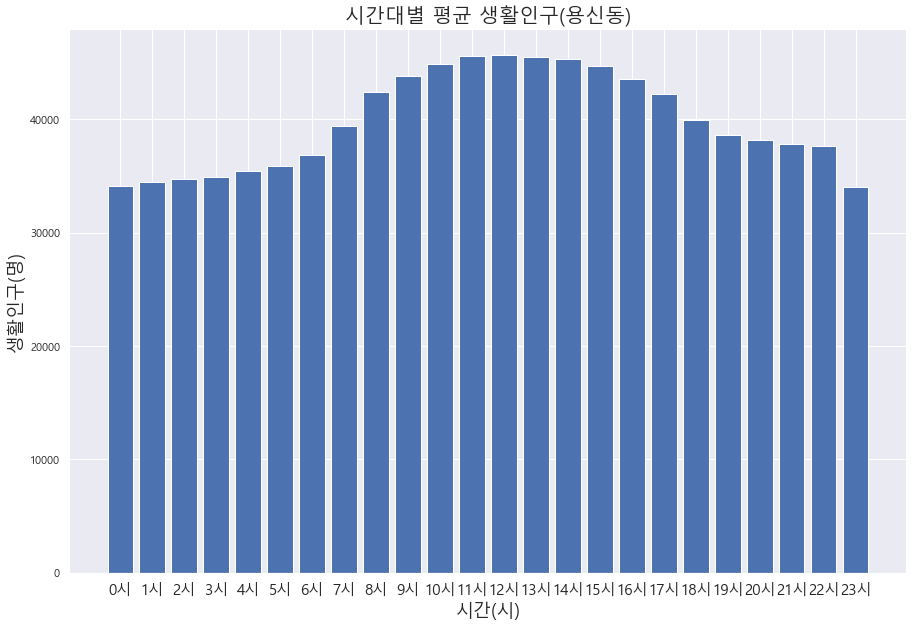

In [79]:
time_pop_mean_gp('용신동')

### 장안1동

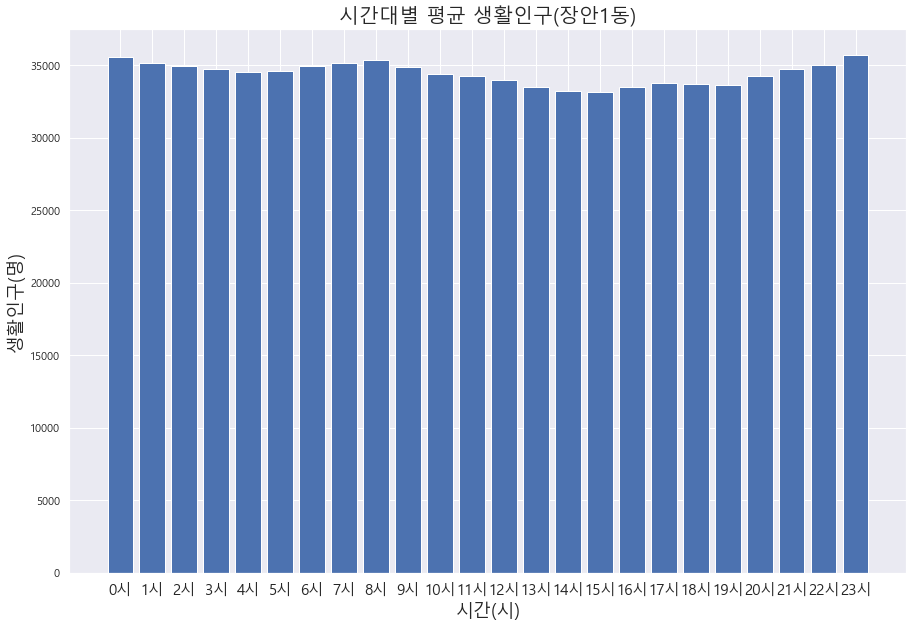

In [80]:
time_pop_mean_gp('장안1동')

### 제기동

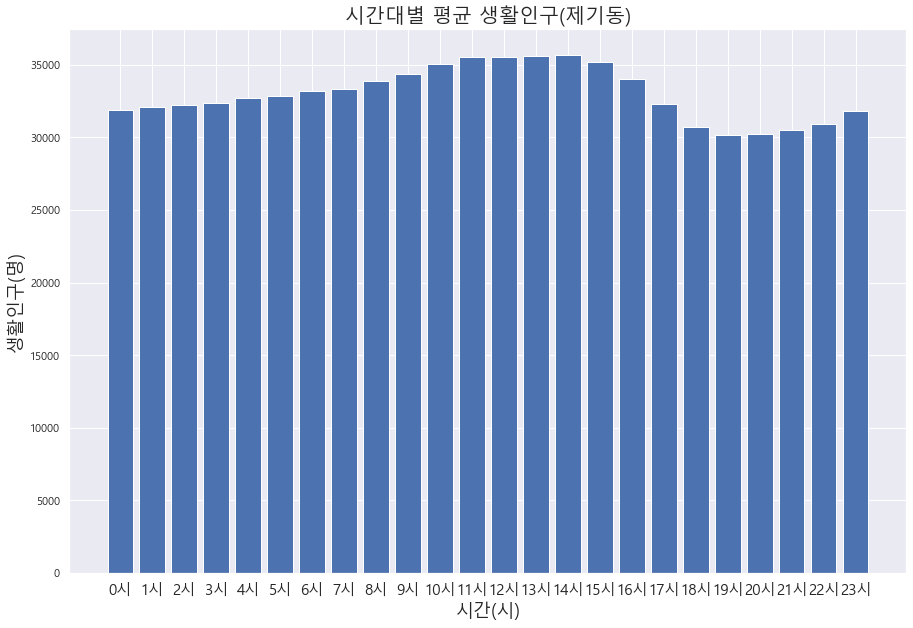

In [81]:
time_pop_mean_gp('제기동')

## 지역별 월별 생활인구

In [99]:
def month_pop_mean_gp(region) :
    pop_month_mean = df_all.groupby(['행정동코드', '월']).총생활인구수.sum() // df_all.groupby(['행정동코드', '월']).총생활인구수.count()
    
    label = []
    for i in range(len(pop_month_mean[region])) :
        label.append(str(i+1)+'월')

    index = np.arange(len(label))
    
    plt.figure(figsize=(15, 10))

    plt.bar(index, pop_month_mean[region])

    plt.title('월별 평균 생활인구' + '(' + region + ')', fontsize=20)

    plt.xlabel('월', fontsize=15)

    plt.ylabel('생활인구', fontsize=15)
    
    plt.xticks(index, label, fontsize=13, rotation=0)

    plt.show()

### 용신동

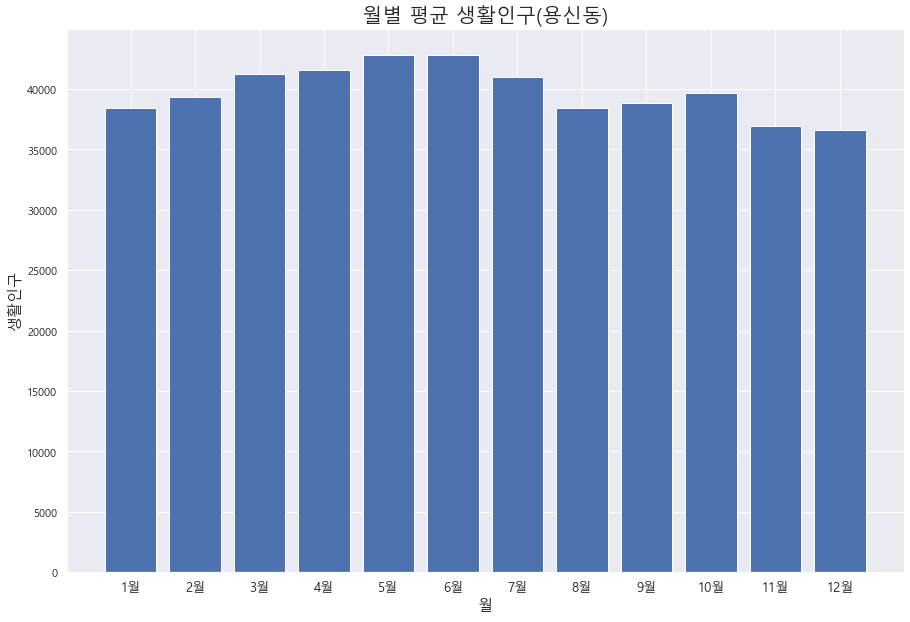

In [100]:
month_pop_mean_gp('용신동')

### 장안1동

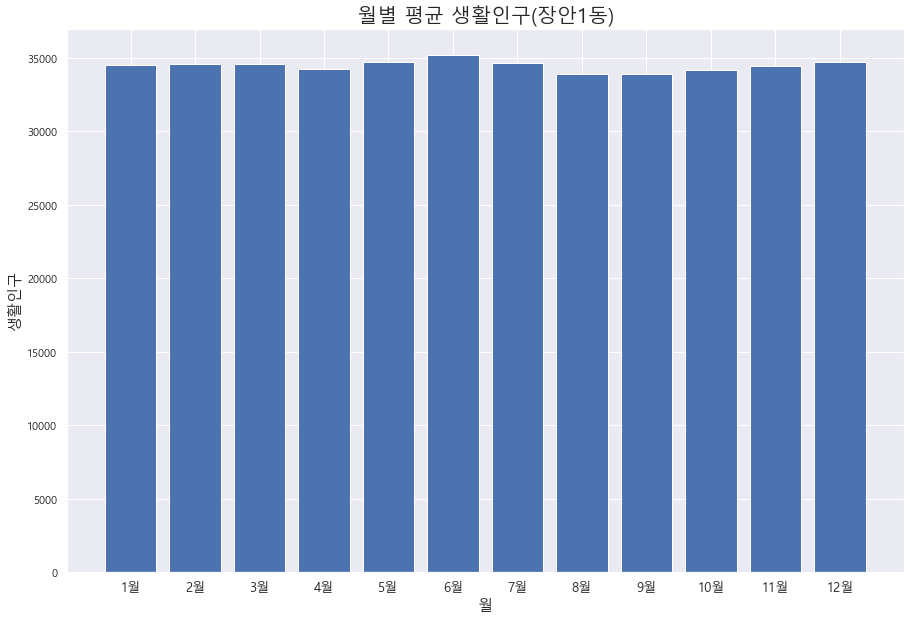

In [101]:
month_pop_mean_gp('장안1동')

### 제기동

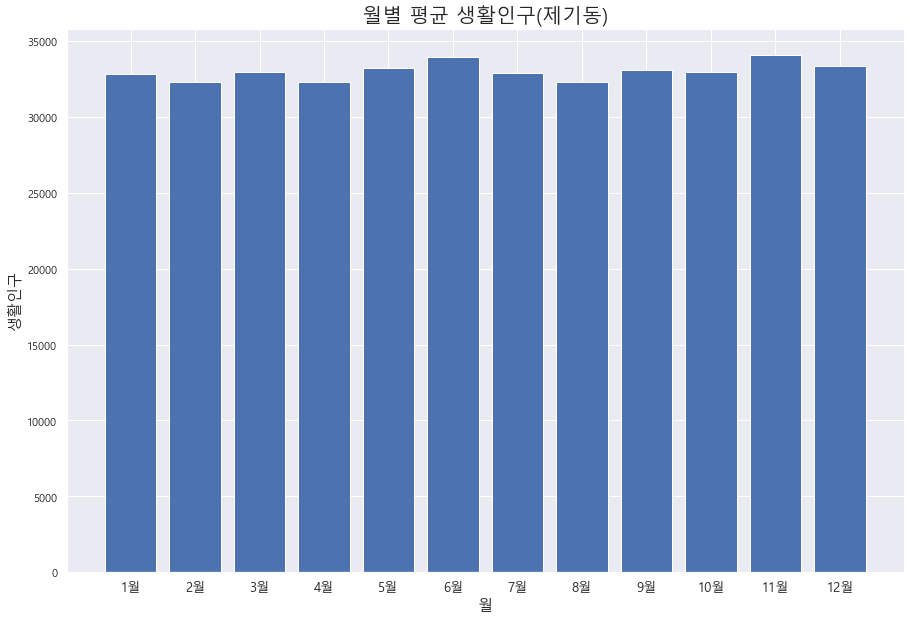

In [102]:
month_pop_mean_gp('제기동')

## 연령별 평균 생활인구

### 5살 주기를 10살 주기로 변경

In [43]:
def combine_ages(df_temp):
    cols = [
    '남자0세부터9세생활인구수', '여자0세부터9세생활인구수', 
    '남자10세부터14세생활인구수', '남자15세부터19세생활인구수', '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', 
    '남자20세부터24세생활인구수', '남자25세부터29세생활인구수', '여자20세부터24세생활인구수', '여자25세부터29세생활인구수',
    '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수', 
    '남자40세부터44세생활인구수', '남자45세부터49세생활인구수', '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', 
    '남자50세부터54세생활인구수', '남자55세부터59세생활인구수', '여자50세부터54세생활인구수', '여자55세부터59세생활인구수', 
    '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', 
    '남자70세이상생활인구수', '여자70세이상생활인구수'
    ]
    df_temp['10세 이하'] = df_temp.남자0세부터9세생활인구수 + df_temp.여자0세부터9세생활인구수
    df_temp['10대'] = df_temp.남자10세부터14세생활인구수 + df_temp.남자15세부터19세생활인구수 + df_temp.여자10세부터14세생활인구수 + df_temp.여자15세부터19세생활인구수
    df_temp['20대'] = df_temp.남자20세부터24세생활인구수 + df_temp.남자25세부터29세생활인구수 + df_temp.여자20세부터24세생활인구수 + df_temp.여자25세부터29세생활인구수
    df_temp['30대'] = df_temp.남자30세부터34세생활인구수 + df_temp.남자35세부터39세생활인구수 + df_temp.여자30세부터34세생활인구수 + df_temp.여자35세부터39세생활인구수
    df_temp['40대'] = df_temp.남자40세부터44세생활인구수 + df_temp.남자45세부터49세생활인구수 + df_temp.여자40세부터44세생활인구수 + df_temp.여자45세부터49세생활인구수
    df_temp['50대'] = df_temp.남자50세부터54세생활인구수 + df_temp.남자55세부터59세생활인구수 + df_temp.여자50세부터54세생활인구수 + df_temp.여자55세부터59세생활인구수
    df_temp['60대'] = df_temp.남자60세부터64세생활인구수 + df_temp.남자65세부터69세생활인구수 + df_temp.여자60세부터64세생활인구수 + df_temp.여자65세부터69세생활인구수
    df_temp['70세 이상'] = df_temp.남자70세이상생활인구수 + df_temp.여자70세이상생활인구수
    df_temp.drop(columns=cols, inplace=True)
    df_temp = df_temp.groupby(['날짜', '월', '주말여부', '행정동코드']).sum()
    df_temp = df_temp.groupby(['월', '주말여부', '행정동코드']).mean()


    return df_temp

In [44]:
combine_ages(df_all)

년  시간대구분         총생활인구수            남성합            여성합  \
월  주말여부 행정동코드                                                                
1  주말   답십리1동  48528.0  276.0  570122.400000  271166.809920  298968.262900   
        답십리2동  48528.0  276.0  562193.400000  267479.335470  294726.173420   
        용신동    48528.0  276.0  858773.900000  430868.354510  427917.500250   
        이문1동   48528.0  276.0  512800.700000  245054.856590  267758.090140   
        이문2동   48528.0  276.0  382303.300000  180063.290420  202251.620030   
...                ...    ...            ...            ...            ...   
12 평일   제기동    48504.0  276.0  810522.347826  395981.319387  414553.102235   
        청량리동   48504.0  276.0  447800.869565  216372.369670  231440.900726   
        회기동    48504.0  276.0  478053.347826  209716.139335  268348.896439   
        휘경1동   48504.0  276.0  401175.000000  179765.760474  221420.858822   
        휘경2동   48504.0  276.0  495573.869565  230601.157139  264984.414922   

                     10세 이하           10대            20대            30대  \
월  주말여부 행정동코드                                                             
1  주말   답십리1동  50859.357130  43369.323950   70858.356800  100219.936940   
        답십리2동  33530.491020  40910.412580   61092.183120   94097.688900   
        용신동    36241.621610  44982.619210  143508.807470  143292.462340   
        이문1동   20145.993810  42785.198920  178512.432870   62575.425340   
        이문2동   28106.223810  37896.253990   46135.124610   52462.121370   
...                     ...           ...            ...            ...   
12 평일   제기동    35336.792526  53334.914152  162453.615074   98591.446600   
        청량리동   18744.136174  27894.468600   64493.773130   58113.301835   
        회기동    22709.474165  41157.701317  162453.913770   62125.479230   
        휘경1동   14983.925996  30520.331617  122405.264200   55350.410109   
        휘경2동   31488.826874  52630.217830  116746.518957   61842.064648   

                         40대            50대            60대         70세 이상  
월  주말여부 행정동코드                                                              
1  주말   답십리1동   99149.311430   83362.336600   62066.447460   60250.002510  
        답십리2동   93033.857030   91328.105490   72150.989160   76061.781590  
        용신동    127516.384650  135015.802200  108968.260800  119259.896480  
        이문1동    60665.799520   56655.156660   42294.767460   49178.172150  
        이문2동    63260.488460   56204.931860   43234.667730   55015.098620  
...                      ...            ...            ...            ...  
12 평일   제기동    101859.997583  118388.272135  106070.989139  134498.394413  
        청량리동    59168.309700   72214.563917   67036.642087   80148.074952  
        회기동     52544.165270   50569.172565   37817.959591   48687.169865  
        휘경1동    48627.131278   50412.852230   38448.856461   40437.847404  
        휘경2동    64542.272157   64219.668200   49216.023513   54899.979883  

[336 rows x 13 columns]

## 작년 수능 생활인구 2021년 11월 18일 목요일

In [37]:
df_all[df_all['날짜'] == '2021-11-18'].groupby(['행정동코드', '시간대구분']).총생활인구수.sum() // df_all[df_all['날짜'] == '2021-11-18'].groupby(['행정동코드', '시간대구분']).총생활인구수.count()


#df_all.groupby(['행정동코드', '월']).총생활인구수.sum() // df_all.groupby(['행정동코드', '월']).총생활인구수.count()

행정동코드  시간대구분
답십리1동  0        25217
       1        25476
       2        25413
       3        25512
       4        25580
                ...  
휘경2동   19       18543
       20       19127
       21       20110
       22       20979
       23       22909
Name: 총생활인구수, Length: 336, dtype: int64

In [38]:
pop_mean = df_all[df_all['날짜'] == '2021-11-18'].groupby('행정동코드').총생활인구수.sum()
pop_mean = pop_mean.sort_values()
pop_mean

행정동코드
이문2동     369172
휘경1동     406992
전농2동     411595
청량리동     439336
회기동      477214
휘경2동     491854
답십리2동    538897
답십리1동    544481
이문1동     606043
장안2동     664641
전농1동     764400
제기동      827737
장안1동     838749
용신동      894969
Name: 총생활인구수, dtype: int32

In [39]:
label = ['이문2동', '휘경1동', '전농2동', '청량리동', '회기동', '휘경2동', '답십리2동', '답십리1동', '이문1동', '장안2동', '전농1동',
        '제기동', '장안1동', '용신동']
    
index = np.arange(len(label))
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

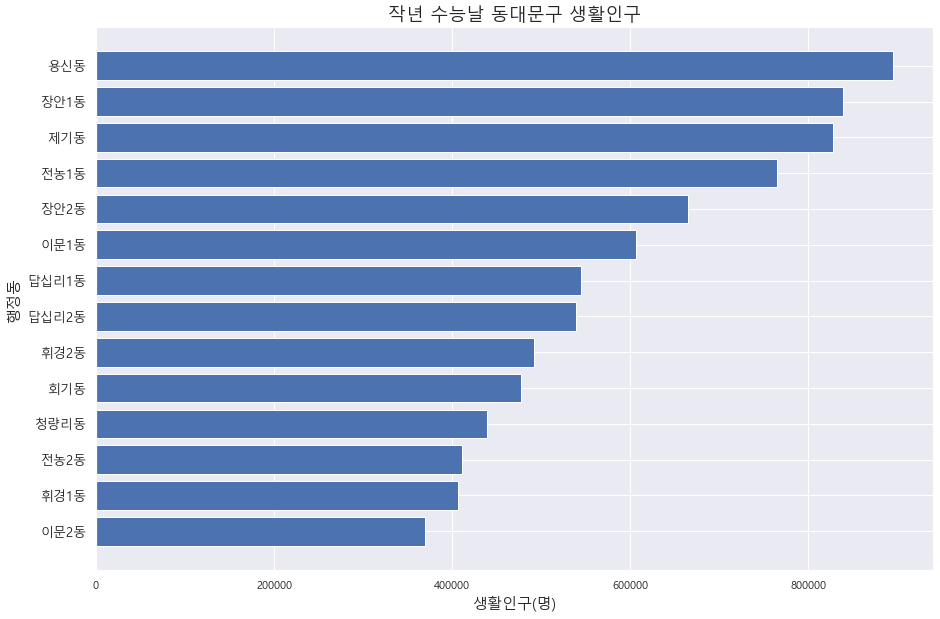

In [40]:
plt.figure(figsize=(15, 10))

plt.barh(index, pop_mean)

plt.title('작년 수능날 동대문구 생활인구', fontsize=18)

plt.ylabel('행정동', fontsize=15)

plt.xlabel('생활인구(명)', fontsize=15)

plt.yticks(index, label, fontsize=13, rotation=0)

plt.show()

In [41]:
def sssss(region) :
    pop_time_mean2 = df_all[df_all['날짜'] == '2021-11-18'].groupby(['행정동코드', '시간대구분']).총생활인구수.sum()
    label = []
    for i in range(len(pop_time_mean2[region])) :
        label.append(str(i)+'시')

    index = np.arange(len(label))
    
    plt.figure(figsize=(15, 10))

    plt.bar(index, pop_time_mean2[region])

    plt.title('작년 수능날 시간대별 평균 생활인구' + '(' + region + ')', fontsize=20)

    plt.xlabel('시간(시)', fontsize=18)

    plt.ylabel('생활인구(명)', fontsize=18)

    plt.xticks(index, label, fontsize=15)

    plt.show()

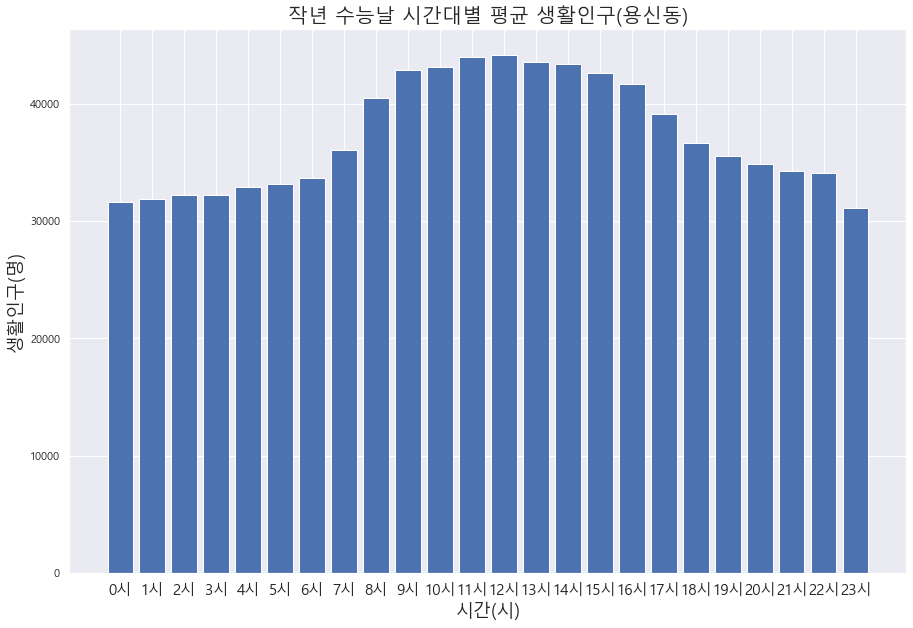

In [42]:
sssss('용신동')